In [1]:
from rewann.tools.experiment_series import ExperimentSeries
from rewann.environment.util import load_gen_metrics
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
series = ExperimentSeries.from_spec_file("../data/iris_uniform")

In [10]:
series.discover_data_dir()
stats = series.assemble_stats()

In [17]:
selection = stats['mean accuracy'] < 0.45
selection = set(stats[selection]['_configuration'])
#selection = False

len(selection)

2

In [18]:
data = list()

for i, c in enumerate(series.configurations()):
    if selection and c not in selection:
        continue
    env = series.configuration_env(c)
    row = load_gen_metrics(env)
    for k, v in series.flat_values(c).items():
        row[k] = v
    row['_conf'] = i
        
    data.append(row)
df = pd.concat(data)

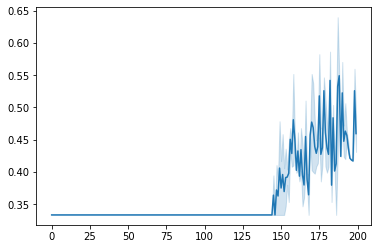

In [19]:
sns.lineplot(hue=df['_conf'], data=df['MAX:accuracy.mean'])
plt.show()

In [15]:
df['_conf']

0       0
1       0
2       0
3       0
4       0
       ..
195    95
196    95
197    95
198    95
199    95
Name: _conf, Length: 2200, dtype: int64